In [4]:
dataset_dir = r'C:\Users\matmi\Desktop\my files\my programs\upscaler_train\dataset'
import os
hr_folder = os.path.join(dataset_dir, 'hr')
lr_folder = os.path.join(dataset_dir, 'lr')

for folder in [lr_folder,hr_folder, dataset_dir]:
    if not os.path.isdir(folder):
        print(f'This folder doesnt exist: {folder}')

In [5]:
##file count check

lr_files = os.listdir(lr_folder)
hr_files = os.listdir(hr_folder)

if len(lr_files) != len(hr_files):
    print('number of files in hr and lr folders are not equal')

for file_name in lr_files:
    if file_name not in hr_files:
        print(f'{file_name}  exists in lr folder but not in hr folder')

for file_name in hr_files:
    if file_name not in lr_files:
        print(f'{file_name}  exists in hr folder but not in lr folder')

------------------------------------------------------------------------------------------------------------------------------------------------------


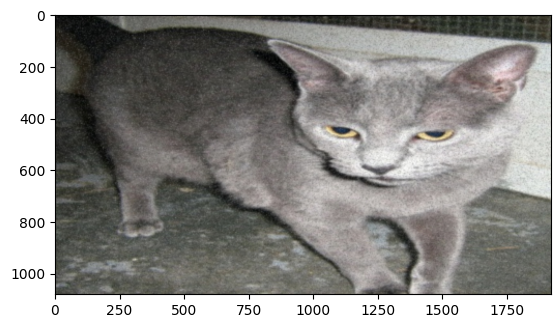

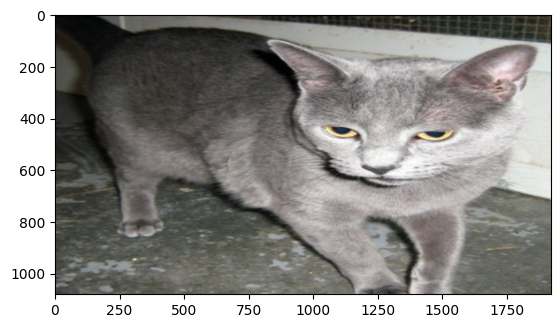

random_lr_file: 0a184fbd77e744709ee8dddb103e4c8c.jpg
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


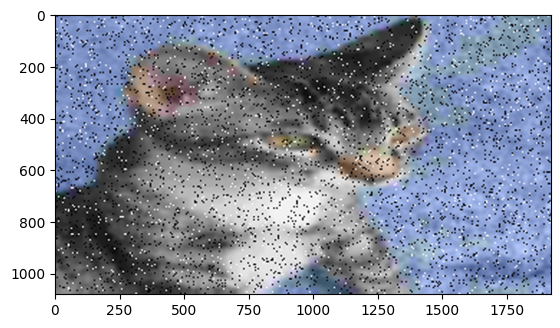

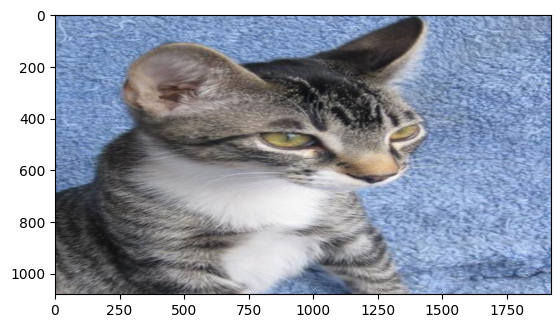

random_lr_file: 41533e5dd86b4d81a957f7dbd03bd365.jpg
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


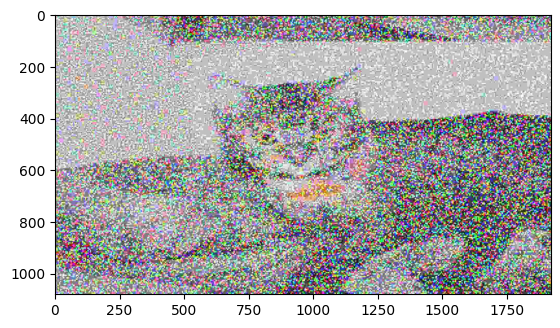

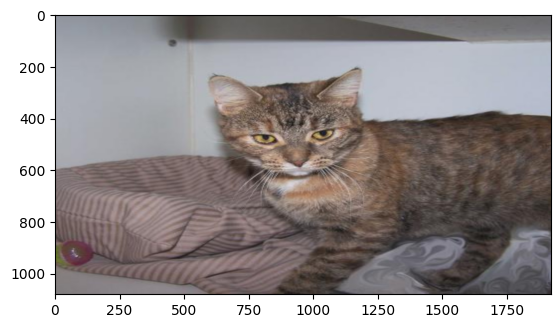

random_lr_file: 3210bc8734e842fda1037db99070da8d.jpg
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


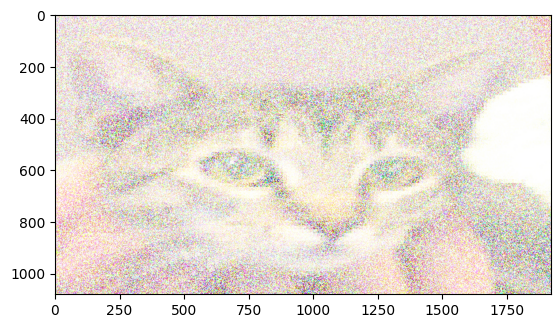

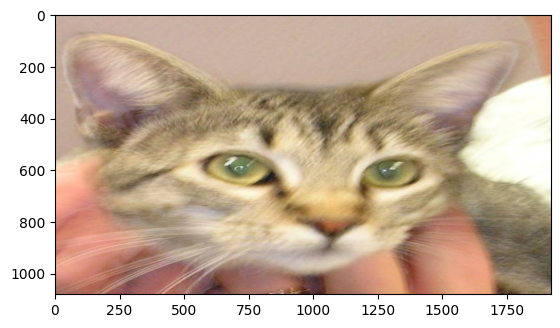

random_lr_file: 177f1bc5d2c34d729055ab3f7763ed5a.jpg
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


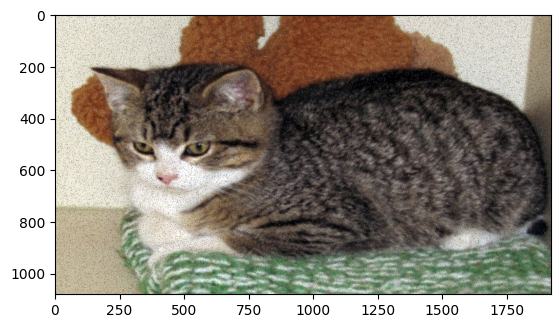

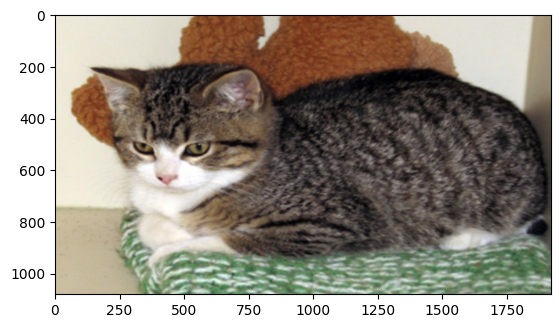

random_lr_file: a9c71be7de0f48b688819bc1d6effc66.jpg
------------------------------------------------------------------------------------------------------------------------------------------------------


In [6]:
# Do the random comparisons between lr and hr
# files making sure theyre the same base image

import cv2
import matplotlib.pyplot as plt
import random

def show_cv2_image(cv2_image):
    plt.imshow(cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB))
    plt.show()

random_lr_files = random.sample(lr_files, 5)
random_hr_files = random.sample(hr_files, 5)


for random_lr_file in random_lr_files:
    print('---'*50)
    lr_file_path = os.path.join(lr_folder, random_lr_file)
    hr_file_path = os.path.join(hr_folder, random_lr_file)
    lr_image = cv2.imread(lr_file_path)
    hr_image = cv2.imread(hr_file_path)
    show_cv2_image(lr_image)
    show_cv2_image(hr_image)
    print('random_lr_file:', random_lr_file)
    print('---'*50)


